In [1]:
!pip install umap-learn==0.4.6
import numpy as np
import pandas as pd

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

from string import punctuation

from collections import Counter
from collections import OrderedDict

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.mixture import GaussianMixture

import umap
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

     |████████████████████████████████| 71kB 4.8MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.4.6-cp36-none-any.whl size=67950 sha256=e471fd4343ef6358f13b7dbf49c3d4c094bb85ef84d7c71b05e298e3aac97e6a
  Stored in directory: /root/.cache/pip/wheels/7d/1d/03/34aade9a9b97acddb8e93654eb856dadbf0964406eef8b96e2
Successfully built umap-learn
  Found existing installation: umap-learn 0.5.0
    Uninstalling umap-learn-0.5.0:
      Successfully uninstalled umap-learn-0.5.0


In [2]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/IRTG/Smart_contracts_paper/USC/SC-classification/output_data/final_probs_unlabelled.csv')
word_vectorizer   = TfidfVectorizer(
                    sublinear_tf  = True,
                    strip_accents = 'unicode',
                    analyzer      = 'word',
                    token_pattern = r'\w{1,}',
                    ngram_range   = (1, 1),
                    max_features  = 7300)

X = df['SC_no_comments']
word_vectorizer.fit(X)
train_word_features = word_vectorizer.transform(X)

In [3]:
color_map = {'finance'   : '#2A702C',
             'high-risk' : '#F20C05',
             'gambling'  : '#05F2C0',
             'games'     : '#9505F2',
             'exchanges' : '#050CF2',
             'other'     : '#A7B2B6'}

In [4]:
# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine', random_state=42).fit_transform(train_word_features)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = df['class']
print(result.labels.value_counts())

/usr/local/lib/python3.6/dist-packages/umap/spectral.py:253: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  "WARNING: spectral initialisation failed! The eigenvector solver\n"


finance      10009
other         4757
exchanges      756
games          506
high-risk      162
gambling        60
Name: labels, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


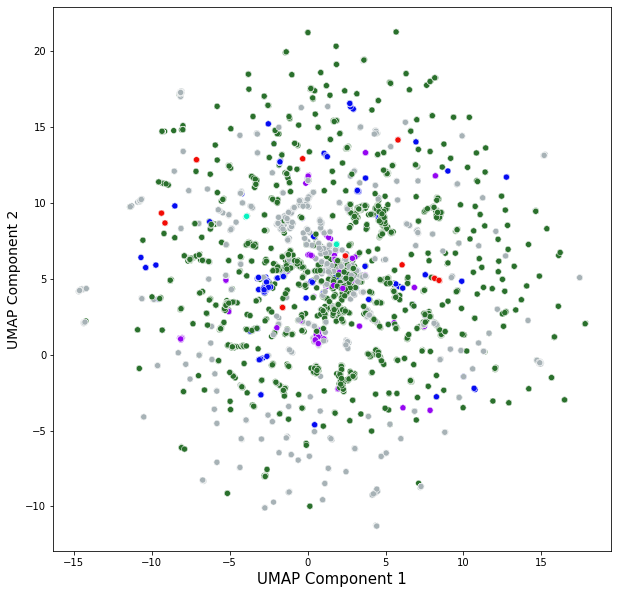

In [6]:
# Visualize clusters
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(result.x, result.y, c=result.labels.map(color_map))
plt.xlabel("UMAP Component 1", fontsize=15)
plt.ylabel("UMAP Component 2", fontsize=14)
plt.savefig(f"drive/MyDrive/Colab Notebooks/IRTG/Smart_contracts_paper/USC/SC-classification/unlabelled_classified.png", transparent=True)